

---
# AUTOR : Michael De La Cruz La Rosa
### 20180176@lamolina.edu.pe
### Michael.dlc.lr@gmail.com
# Diagrama Hovmöller de Anomalías de temperatura superficial del mar en el pacífico ecuatorial

---


In [1]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [2]:
# Trabajamos en colab:
from google.colab import drive
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/OCEANOGRAFIA/' # Directorio de trabajo

os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# !wget ftp://ftp2.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc

--2024-03-08 19:12:53--  ftp://ftp2.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc
           => ‘sst.mon.mean.nc.2’
Resolving ftp2.psl.noaa.gov (ftp2.psl.noaa.gov)... 140.172.38.117
Connecting to ftp2.psl.noaa.gov (ftp2.psl.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/noaa.oisst.v2.highres ... done.
==> SIZE sst.mon.mean.nc ... 2115138821
==> PASV ... done.    ==> RETR sst.mon.mean.nc ... done.
Length: 2115138821 (2.0G) (unauthoritative)

sst.mon.mean.nc.2   100%[===================>]   1.97G  18.3MB/s    in 88s     

2024-03-08 19:14:21 (22.9 MB/s) - ‘sst.mon.mean.nc.2’ saved [2115138821]



In [4]:
sst = xr.open_dataset(path + 'sst.mon.mean.nc')
# sst['time'] = pd.date_range(sst.time[0].values, sst.time[-1].values, freq = 'MS')
sst

<xarray.Dataset>
Dimensions:  (time: 510, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2024-02-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [5]:
year_inicio = '1991-01-01'
year_fin = '2020-12-31'
clim = sst.sel(time=slice(f'{year_inicio}', f'{year_fin}')).groupby('time.month').mean(dim='time')
# Calcular la anomalía mensual en relación al promedio climatológico de cada mes del año
anom = sst.groupby('time.month') - clim
anom

<xarray.Dataset>
Dimensions:  (time: 510, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2024-02-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    month    (time) int64 9 10 11 12 1 2 3 4 5 6 7 ... 4 5 6 7 8 9 10 11 12 1 2
Data variables:
    sst      (time, lat, lon) float32 nan nan nan ... -0.04969 -0.04758 -0.04701

In [12]:
# %%capture
# # ----------------------------------------------
# !pip -q install --no-binary shapely shapely --force
# !pip -q install cartopy

In [10]:
from scipy.ndimage import gaussian_filter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap

In [99]:
def Hovmoller(datax,sigma,year):
  fig = plt.figure(figsize=(10, 8))
  # Use gridspec to help size elements of plot; small top plot and big bottom plot
  gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1, 6], hspace=0.15)

  #----------------------------------------------------------------------------------------
  # Gráfica 1
  ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree(central_longitude=180))
  ax1.set_extent([100, 285, -5, 5], crs=ccrs.PlateCarree())
  ax1.set_yticks([-5, 0, 5])
  ax1.set_xticks([-80,-60,-40,-20,0,20,40,60,80,100])
  ax1.set_xticklabels(['100°E','120°E','140°E','160°E','180°', '160°W', '140°W', '120°W', '100°W','80°W'])
  ax1.grid(linestyle='dotted', linewidth=2)
  #----------------------------------------------------------------------------------------
  # Bordes
  ax1.add_feature(cfeature.COASTLINE.with_scale('10m'))
  ax1.add_feature(cfeature.LAKES.with_scale('50m'), color='black', linewidths=0.5)
  ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)

  plt.title(f'Diagrama Hovmöller, Años: {year}-{next_year}', fontsize=12, loc='center')
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  #----------------------------------------------------------------------------------------
  # Gráfica 2
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.invert_yaxis()
  levels = np.arange(-4, 5, 0.5)
  sigma = sigma
  interp_temp_smooth = gaussian_filter(datax, sigma=sigma)
  #----------------------------------------------------------------------------------------
  colors = mcolors.LinearSegmentedColormap.from_list('paleta',
                                                     ['#053061', '#2166AC', '#4393C3', '#92C5DE', # Azules
                                                      '#FFFFFF', '#FFFFFF', # Blancos
                                                      '#FDDBC7', '#F4A582', '#D6604D', '#B2182B', '#67001F']) # Rojos
  # cf = ax2.contourf(datax.lon, datax.time, interp_temp_smooth, levels, cmap='RdBu_r', extend='both')
  cf = ax2.contourf(datax.lon, datax.time, interp_temp_smooth, levels, cmap=colors, extend='both')
  # # Definir niveles de las líneas de contorno
  black_levels = [-6,-5,-4,-3,-2,-1.5,-1,-0.5,0.5,1,2,3,4,4.5,5,6]
  grey_levels = [level for level in levels if level not in black_levels]
  # Aplicar un suavizado a las líneas de contorno
  cs2 = ax2.contour(datax.lon, datax.time, interp_temp_smooth, levels = black_levels, colors='black',  linewidths=0.9, linestyles='-')
  cs3 = ax2.contour(datax.lon, datax.time, interp_temp_smooth, levels = grey_levels, colors='whitesmoke',  linewidths=0.5, linestyles='--')
  #----------------------------------------------------------------------------------------
  # # Agregar etiquetas a las líneas de contorno
  ax2.clabel(cs2, fmt='%2.1f', colors='black', fontsize=12)
  ax2.set_xlim(100, 282)
  ax2.set_xticks([100, 120,140,160,180,200,220,240,260,280])
  ax2.set_xticklabels(['100°E','120°E','140°E','160°E','180°', '160°W', '140°W', '120°W', '100°W','80°W'])
  #----------------------------------------------------------------------------------------
  # Agregar etiquetas de valores en la barra de colores
  cbar = fig.colorbar(cf, ax=ax2, ticks=np.arange(-4, 5))
  cbar.ax.tick_params(labelsize=10)
  cbar.ax.set_yticklabels(['{:.0f}'.format(i) for i in np.arange(-4,5)])
  cbar.set_label('Anomalías TSM' ,fontsize = 12)

  #----------------------------------------------------------------------------------------
  # Ajustar el largo de la gráfica superior (Gráfica 1) manualmente
  top_plot_height = 0.1  # Ajusta este valor según tus necesidades
  bottom_plot_height = 0.7
  top_plot_position = bottom_plot_height + 0.05  # Espacio entre las gráficas
  # Achicar el extremo derecho de la gráfica superior
  ax1.set_position([0.1245, top_plot_position, 0.621, top_plot_height])
  # 0.12 (ajusta el extremo izquierdo ->), # 0.63 (ajusta el extremo derecho <-)
  plt.grid(axis='y', linestyle = '--',alpha=0.5)

  ax2.yaxis.set_major_locator(mdates.MonthLocator())
  ax2.yaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
  ax2.set_ylim(datax.time.values[-1], datax.time.values[0])
  # Establecer ticks del eje Y, excluyendo el último
  yticks = ax2.get_yticks()
  ax2.set_yticks(yticks[:-1])
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  #----------------------------------------------------------------------------------------
  plt.text(0, -0.10, 'Fuente de datos: OISST V2',  style="oblique", fontsize=12, ha='left',
        va='center', color='black', transform=plt.gca().transAxes)

  # fig.savefig(path + f'Hov{year}-{next_year}.jpg',
  #                 transparent = False, pad_inches = 0.1, dpi = 900, bbox_inches = 'tight')
  #----------------------------------------------------------------------------------------
  plt.show()
  plt.close()



---


# Link de eventos xd:
# https://www.dhn.mil.pe/Archivos/Oceanografia/ENFEN/nota_tecnica/Definicion%20Operacional%20ENFEN_09abr12.pdf


---


# EVENTOS NIÑO:
1. 1982 (7) - 1983 (11)  (Extraordinario)
2. 1997 (3) - 1998 (9) (Extraordinario)

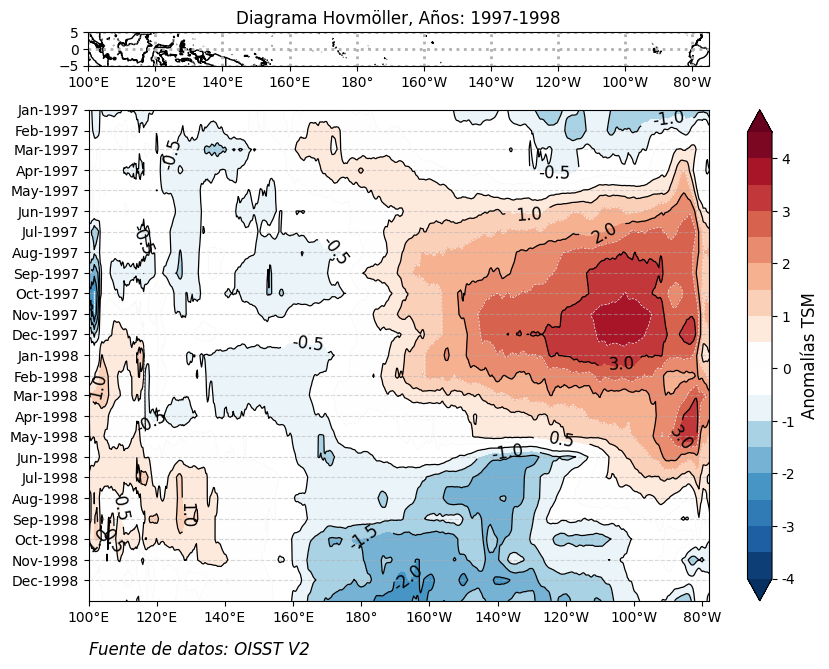

In [100]:
years = [1997,1998]
for i in range(len(years)-1):
  year = years[i]
  next_year = years[i+1]
  Hovmoller(anom['sst'].sel(time=slice(f'{year-1}-12-31',f'{next_year+1}-01-01')).sel(lat=slice(-5,5)).sel(lon=slice(0,360)).mean(dim='lat'), 0,year)

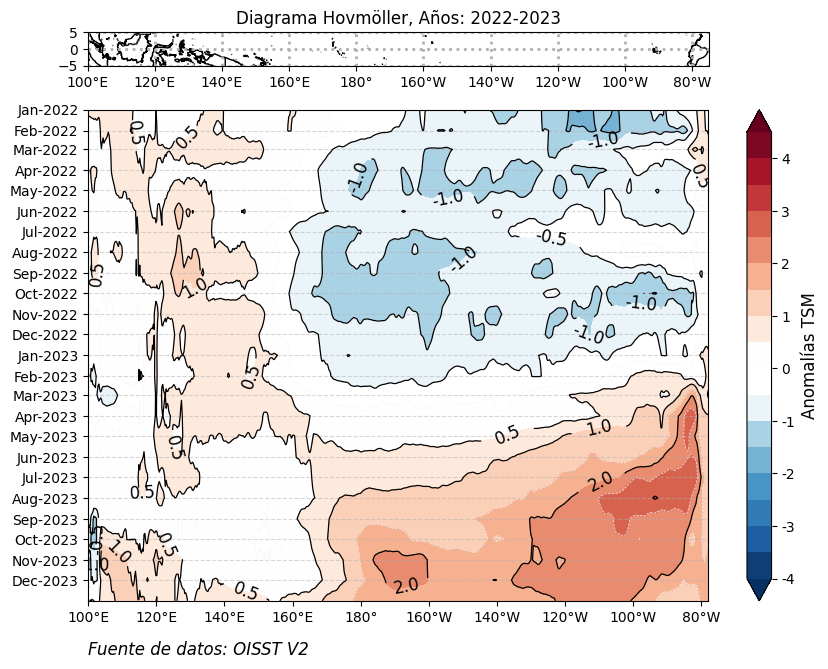

In [101]:
years = [2022,2023]
for i in range(len(years)-1):
  year = years[i]
  next_year = years[i+1]
  Hovmoller(anom['sst'].sel(time=slice(f'{year-1}-12-31',f'{next_year+1}-01-01')).sel(lat=slice(-5,5)).sel(lon=slice(0,360)).mean(dim='lat'), 0,year)